In [136]:
import spotipy
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API
name = "Lorde" #chosen artist
result = sp.search(name) #search query
result['tracks']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/163tK9Wjr9P9DmM0AVK7lm'},
  'href': 'https://api.spotify.com/v1/artists/163tK9Wjr9P9DmM0AVK7lm',
  'id': '163tK9Wjr9P9DmM0AVK7lm',
  'name': 'Lorde',
  'type': 'artist',
  'uri': 'spotify:artist:163tK9Wjr9P9DmM0AVK7lm'}]

In [137]:
#Extract Artist's uri
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']
#Pull all of the artist's albums
sp_albums = sp.artist_albums(artist_uri, album_type='album')
#Store artist's albums' names' and uris in separate lists
album_names = []
album_uris = []
for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])
    
album_names
album_uris
#Keep names and uris in same order to keep track of duplicate albums

['spotify:album:4oCGmYsAQOWt2ACWTpNUU6',
 'spotify:album:6tBpgZG9bV76nSuiz42RbA',
 'spotify:album:2B87zXm9bOWvAJdkJBTpzF',
 'spotify:album:0RprDFd8KN06rt0jyKXBsC',
 'spotify:album:2nPokmAvYy5qYO4rFU7ZDm',
 'spotify:album:0rmhjUgoVa17LZuS8xWQ3v',
 'spotify:album:6rnzvZhe3PA57xKcKLRtJ6']

In [138]:
def albumSongs(uri):
    album = uri #assign album uri to a_name
    spotify_albums[album] = {} #Creates dictionary for that specific album
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    tracks = sp.album_tracks(album) #pull data on album tracks
    for n in range(len(tracks['items'])): #for each song track
        spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])
        
spotify_albums = {}
album_count = 0
for i in album_uris: #each album
    albumSongs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album Melodrama songs has been added to spotify_albums dictionary
Album Melodrama songs has been added to spotify_albums dictionary
Album Melodrama songs has been added to spotify_albums dictionary
Album Melodrama songs has been added to spotify_albums dictionary
Album Pure Heroine songs has been added to spotify_albums dictionary
Album Pure Heroine songs has been added to spotify_albums dictionary
Album Pure Heroine (Extended) songs has been added to spotify_albums dictionary


In [139]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    #create a track counter
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
        #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [140]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 8.23931884765625 seconds


In [141]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])

84

In [142]:
import pandas as pd
df = pd.DataFrame.from_dict(dic_df)
print(len(df))
final_df = df.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
final_df.head()

84


,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
11,Melodrama,12,5u64RlrnvvbtNh6R0EMh6o,Homemade Dynamite - REMIX,spotify:track:5u64RlrnvvbtNh6R0EMh6o,0.2290,0.781,0.548,0.000000,0.1270,-4.997,0.0764,106.996,0.175,68
24,Melodrama,1,6ie2Bw3xLj2JcGowOlcMhb,Green Light,spotify:track:6ie2Bw3xLj2JcGowOlcMhb,0.0209,0.594,0.721,0.000009,0.0879,-7.812,0.0957,128.942,0.253,75
25,Melodrama,2,7eElVgPcxDqmgGrSwVFI74,Sober,spotify:track:7eElVgPcxDqmgGrSwVFI74,0.1730,0.796,0.467,0.004110,0.1260,-10.369,0.1810,107.901,0.516,61
26,Melodrama,3,02oAUzv4M0ItuTDy2RT3IT,Homemade Dynamite,spotify:track:02oAUzv4M0ItuTDy2RT3IT,0.2870,0.771,0.431,0.000003,0.0934,-5.423,0.0577,107.047,0.268,62
27,Melodrama,4,5q4BpnMrYEFzLO0dYODj6J,The Louvre,spotify:track:5q4BpnMrYEFzLO0dYODj6J,0.2390,0.664,0.382,0.007490,0.0943,-9.977,0.0470,123.214,0.126,64


In [143]:
final_df.to_csv("/Users/sejaldua/Desktop/DIS/spotify_proj/lorde.csv")


[0.526, 0.49, 0.47, 0.533, 0.7099055555555556]


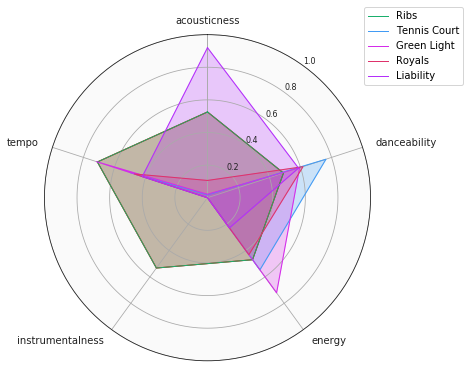

In [152]:
# labels = ['Acceleration', 'Displacement', 'Horsepower', 'MPG', 'Weight']
import matplotlib.pyplot as plt
# Let's look at the 1970 Chevy Impala and plot it.
# values = final_df.loc['chevrolet impala 1970'].tolist()
labels = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'tempo']
new_df = final_df.loc[ : , ['name', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'tempo'] ]
new_df.set_index('name', inplace=True)
new_df.head()
values = new_df.loc['Ribs'].tolist()
values[-1] = values[-1]/180
print(values)

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
values += values[:1]
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw the outline of our data.
ax.plot(angles, values, color='red', linewidth=1)
# Fill it in.
ax.fill(angles, values, color='red', alpha=0.25)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')
    
ax.set_ylim(0, 1)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Helper function to plot each car on the radar chart.
def add_to_radar(song_name, color):
  values = new_df.loc[song_name].tolist()
  values[-1] = values[-1]/180
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=song_name)
  ax.fill(angles, values, color=color, alpha=0.25)

# Add each car to the chart.
add_to_radar('Ribs', '#1aaf6c')
add_to_radar('Tennis Court', '#429bf4')
add_to_radar('Green Light', '#d42cea')
add_to_radar('Royals', '#de326b')
add_to_radar('Liability', '#b42ffa')

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Lastly, give the chart a title and give it some
# padding above the "Acceleration" label.
#ax.set_title('42 - Mumford and Sons', y=1.08)

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))